In [1]:
#Install pakages
#using Pkg 
#Pkg.add("PyCall")
#Pkg.add("Statistics")
#Pkg.add("Images")
#Pkg.add("QuartzImageIO")
#Pkg.add("ImageMagick")

In [2]:
using PyCall
using Statistics
using Images

┌ Info: Recompiling stale cache file /Users/simon/.julia/compiled/v1.0/Images/H8Vxc.ji for Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
└ @ Base loading.jl:1190


## !!! Restart Kernal after changing environment !!!

In [3]:
# Set environment
#ENV["PYTHON"] = "/Users/simon/anaconda3/envs/sentinel/bin/python3"
#Pkg.build("PyCall")

Check wich python is used

In [4]:
PyCall.pyprogramname

"/Users/simon/anaconda3/envs/sentinel/bin/python3"

#### Load raterio with PyCall
The `pyimport` function is used to import python libaries


In [5]:
rasterio = pyimport("rasterio")

PyObject <module 'rasterio' from '/Users/simon/anaconda3/envs/sentinel/lib/python3.7/site-packages/rasterio/__init__.py'>

The dataset can now be loaded with `rasterio.open()`, and a list of the keys

In [6]:
path = "/Users/simon/Data/Sentinel/S1B_IW_SLC__1SDV_20190808T165222_20190808T165249_017497_020E7C_E4E3.SAFE/measurement/s1b-iw2-slc-vv-20190808t165224-20190808t165249-017497-020e7c-005.tiff"
dataset = rasterio.open(path)

PyObject <open DatasetReader name='/Users/simon/Data/Sentinel/S1B_IW_SLC__1SDV_20190808T165222_20190808T165249_017497_020E7C_E4E3.SAFE/measurement/s1b-iw2-slc-vv-20190808t165224-20190808t165249-017497-020e7c-005.tiff' mode='r'>

Get the methods and atribute names with `keys()`

In [7]:
println(keys(dataset))

Symbol[:__class__, :__delattr__, :__dict__, :__dir__, :__doc__, :__enter__, :__eq__, :__exit__, :__format__, :__ge__, :__getattribute__, :__gt__, :__hash__, :__init__, :__init_subclass__, :__le__, :__lt__, :__module__, :__ne__, :__new__, :__pyx_vtable__, :__reduce__, :__reduce_ex__, :__repr__, :__setattr__, :__setstate__, :__sizeof__, :__str__, :__subclasshook__, :__weakref__, :_block_shapes, :_closed, :_count, :_crs, :_crs_wkt, :_descriptions, :_dtypes, :_env, :_gcps, :_get_crs, :_handle_crswkt, :_has_band, :_mask_flags, :_nodatavals, :_offsets, :_read, :_scales, :_set_all_descriptions, :_set_all_offsets, :_set_all_scales, :_set_all_units, :_set_attrs_from_dataset_handle, :_set_crs, :_set_gcps, :_set_nodatavals, :_transform, :_units, :block_shapes, :block_size, :block_window, :block_windows, :bounds, :checksum, :close, :closed, :colorinterp, :colormap, :compression, :count, :crs, :dataset_mask, :descriptions, :driver, :dtypes, :files, :gcps, :get_gcps, :get_nodatavals, :get_tag_item, 

Show meta data

In [8]:
dataset.meta

Dict{Any,Any} with 8 entries:
  "driver"    => "GTiff"
  "dtype"     => "complex"
  "height"    => 13500
  "nodata"    => nothing
  "count"     => 1
  "width"     => 23170
  "transform" => (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
  "crs"       => nothing

### Load image

In [7]:
#VVraw = dataset.read(1,window = ((2000,8000), (2000,8000)))
VVraw = dataset.read(1)
typeof(VVraw)

Array{Complex{Float64},2}

In [8]:
abs(VVraw[1,1])

0.0

### convert to real and normalise for show

In [9]:
VVraw = abs.(VVraw)
VVraw = VVraw./quantile(reshape(VVraw, :), 0.98);

In [12]:
Show_img = abs.(copy(VVraw))
Show_img = Show_img./quantile(reshape(Show_img, :), 0.98);

In [13]:
Show_img = Show_img./quantile(reshape(Show_img, :), 0.98);

### Show image

┌ Info: Recompiling stale cache file /Users/simon/.julia/compiled/v1.0/QuartzImageIO/n8vDP.ji for QuartzImageIO [dca85d43-d64c-5e67-8c65-017450d5d020]
└ @ Base loading.jl:1190


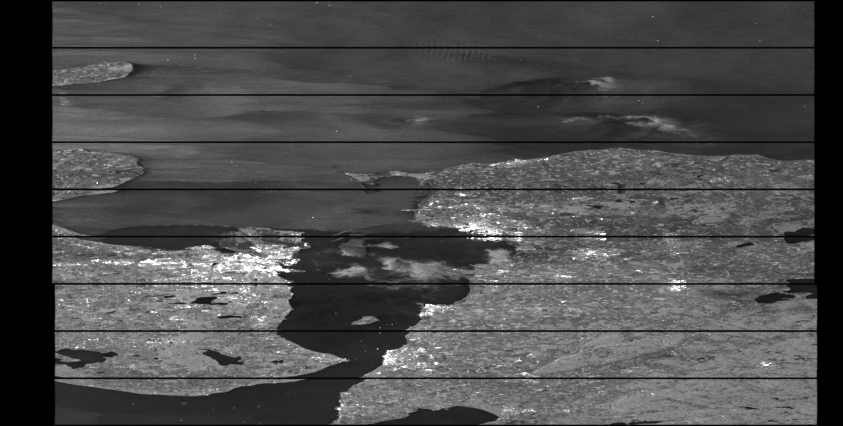

In [10]:
Gray.(VVraw)